# Parkfield`s Earthquakes

In this project I am exploring the earthquakes in Parkfield, California.
Parkfield lies along the San Andreas Fault, one of the longest and most active faults in the United States. 
Here in this project I am analyzing the magnituds and the timings of when the earthquekes happen.
The data set is taken from https://earthquake.usgs.gov/research/parkfield/livedata.php

In [245]:
#Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF
import datetime
import scipy.stats as ss

### Read Data
After the nexessary imports are done, we will read the data into a dataframe and save the magnitudes in numpy array.
We will make some exploratory data analysis of the magnitudes.

In [104]:
df=pd.read_csv('earthquakes.csv')

In [105]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
0,1951-10-03 13:44:33.170,35.869333,-120.451000,6.0,3.67,ml,6.0,259.0,1.5480,0.43,...,31.61,0.154,10.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
1,1953-05-28 07:58:34.510,36.004167,-120.501167,6.0,3.61,ml,7.0,296.0,0.9139,0.39,...,31.61,NaN,1.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
2,1961-12-14 11:51:15.410,35.970000,-120.470167,6.0,3.95,ml,12.0,297.0,0.8718,0.51,...,31.61,0.070,11.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
3,1965-02-21 18:39:24.500,35.881000,-120.383500,6.0,3.54,ml,10.0,257.0,1.5380,0.56,...,31.61,0.048,11.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
4,1966-06-28 04:18:36.180,35.856500,-120.446167,6.0,3.15,ml,7.0,259.0,1.3120,0.32,...,31.61,0.105,7.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US


In [106]:
magnitudes = df.mag.values

In [107]:
magnitudes

array([3.67, 3.61, 3.95, ..., 0.61, 0.33, 0.7 ])

### EDA of magnitudes

Now, let`s make some exploratory data analysis

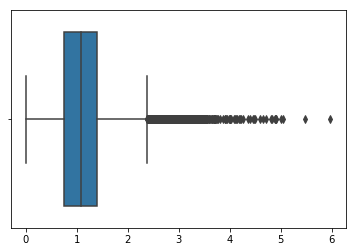

In [108]:
sns.boxplot(magnitudes)

(array([1.653e+03, 4.594e+03, 2.380e+03, 8.310e+02, 3.060e+02, 1.700e+02,
        3.600e+01, 1.100e+01, 8.000e+00, 2.000e+00]),
 array([0.   , 0.597, 1.194, 1.791, 2.388, 2.985, 3.582, 4.179, 4.776,
        5.373, 5.97 ]),
 <a list of 10 Patch objects>)

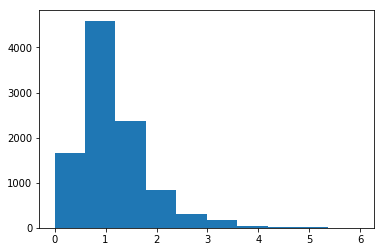

In [109]:
plt.hist(magnitudes)

In [110]:
df.mag.describe()

count    9991.000000
mean        1.154315
std         0.662153
min         0.000000
25%         0.750000
50%         1.080000
75%         1.400000
max         5.970000
Name: mag, dtype: float64

We can see that most of the magnitudes are at around one, but there are also ouliers, which result in very big earthquakes.
To better understand how the magnitudes are distributed, let`s explore the CDF.

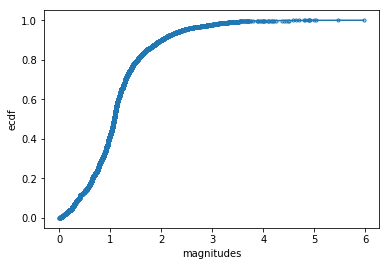

In [111]:
cdf = ECDF(magnitudes)
_ = plt.plot(cdf.x, cdf.y, marker=".", markerfacecolor='none')
_ = plt.xlabel('magnitudes')
_ = plt.ylabel('ecdf')
#_ = plt.legend("hh")

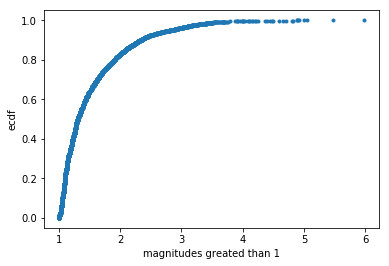

In [112]:
cdf_1 = ECDF(magnitudes[magnitudes>1])
_ = plt.plot(cdf_1.x,cdf_1.y,marker='.',linestyle='none')
_ = plt.xlabel('magnitudes greated than 1')
_ = plt.ylabel('ecdf')

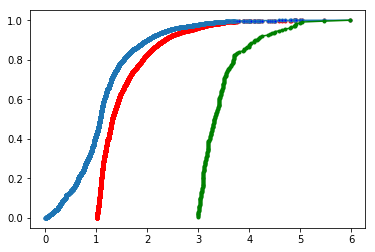

In [113]:
_ = plt.plot(cdf_1.x,cdf_1.y,marker='.',linestyle='none',color='red')
_ = plt.plot(cdf.x, cdf.y, marker=".", markerfacecolor='blue')
cdf_3 = ECDF(magnitudes[magnitudes>=3])
_ = plt.plot(cdf_3.x,cdf_3.y,marker='.',color='green')

It looks like magnitudes greater than 1 are following exponential distribution. 
This shift of the CDF (magnitude of 1) on the x axes is called location parameter. In seismology, the location parameter
is called the magnitude of completeness (Mt)(completeness treshhold) and is defined as the minimum magnitude above which all earthquakes within a certain region are reliably recorded. 
This distribution of the magnitudes in fact, is summarized in Gutenberg–Richter law which states that the magnitudes of earthquakes in a given region over a given time are Exponentially distributed. The optimal parameter is given by the difference between the mean of the magnitudes and the completeness treshold (Mmean - Mt). Usualy, seismologists multiply this value with Ln10 and they get a parameter called b-value defines as b = (Mmean - Mt)*ln10. For seismology active regions, b has values of around 1. Let`s now explore the b value of parkfield region and it`s confidence interval. For convinience we will compare the cdf of the magnitudes with the theorethical exponential cdf.

In [114]:
mt = 1 # we will take mt=3 as there are a lot of magnitudes with value of 3
m = magnitudes[magnitudes>mt]
b = (np.mean(m)-mt)*np.log(10)

In [115]:
b

1.247747323645304

In [116]:
#We will create 10 000 bootstrap replicates for the mean of m and compute confidence intervals
reps=np.empty(10000)
b_reps = np.empty(10000)
for i in range(10000):
    reps[i] = np.mean(np.random.choice(m,len(m)))
    b_reps[i] = (reps[i]-mt)*np.log(10)

In [117]:
conf_int = np.percentile(b_reps,[2.5,97.5])

In [118]:
conf_int

array([1.21316001, 1.28336334])

In [119]:
ecdf_t = ECDF(np.random.exponential((b/np.log(10)),size = len(magnitudes))+mt)

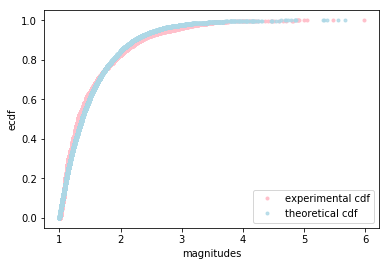

In [120]:
_ = plt.plot(cdf_1.x,cdf_1.y,marker='.',linestyle='none',color='pink')
_ = plt.plot(ecdf_t.x,ecdf_t.y,marker='.',linestyle='none',color='lightblue',alpha = 0.8)
_ = plt.xlabel('magnitudes')
_ = plt.ylabel('ecdf')
_ = plt.legend(['experimental cdf','theoretical cdf'])

We got a b-value of around 1.25 which is expected for seismicaly active regions.Parkfield seems to follow Gutenberg`s law,the magnitudes indeed, follow Exponential distribution.

In [122]:
df[df.mag>5]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
5,1966-06-28 04:26:16.260,35.790500,-120.294000,6.000,5.47,ml,15.0,247.0,1.18300,0.48,...,31.61,0.075,8.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
3153,2004-09-28 17:15:24.250,35.818167,-120.366000,8.136,5.97,mw,61.0,26.0,0.01622,0.04,...,0.25,NaN,4.0,reviewed,nc,nc,Shandon,California,San Luis Obispo County,US
3810,2004-09-29 17:10:04.960,35.885502,-120.505837,-0.457,5.04,mw,158.0,161.0,NaN,0.25,...,14.26,NaN,6.0,reviewed,ci,ci,San Miguel,California,San Luis Obispo County,US


### Timings of Earthquakes in Parkfield

Now we will explore the timings of the earthquakes. Region of Parkfield is in the center of the Seismologists interest,
and there is a whole project named The Parkfield Experiment in which the Scientists try to predict when the next earthquake will happen.
Let`s now see what story follow the time gaps in years between the major earthquakes in Parkfield. What is their distribution? In the recent years, there have been 6 major earthquakes ,with magnitudes of around 6, in San Andreas fault. They have happened on the following dates:

9 January 1857,
2 February 1881,
3 March 1901,
10 March 1922,
8 June 1934,
28 June 1966,
28 September 2004

The difference in years between the times when these major earthquakes happen, I have stored in list time_diff and are taken from:

https://earthquake.usgs.gov/research/parkfield/bakunLindh85.html

In [141]:
time_diff=[24.06575342, 20.08607305,21.01917808,12.24611872,32.05479452, 38.25]

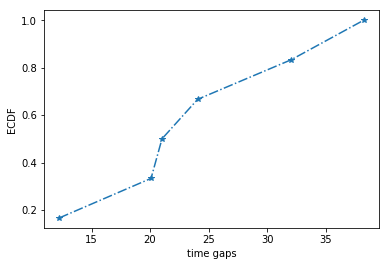

In [154]:
cdf_time = ECDF(time_diff)
_ = plt.plot(cdf_time.x,cdf_time.y,marker='*',linestyle='-.')
_ = plt.xlabel('time gaps')
_ = plt.ylabel('ECDF')

With 6 data points, eyebowling the ECDf it is hard to tell which distribution it follows. On the same figure we will plot Exponential and Normal to check which one suits better. We will use the mean and standard deviation from time_diff array.

In [158]:
time_mean = np.mean(time_diff)
time_std = np.std(time_diff)

In [160]:
exp  = np.random.exponential(time_mean,size=10000)
norm = np.random.normal(time_mean,time_std,size=10000)
exp_cdf = ECDF(exp)
norm_cdf=ECDF(norm)

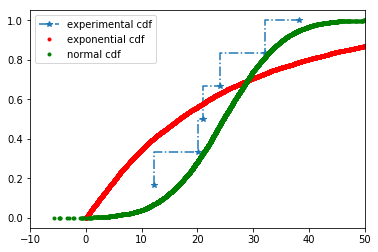

In [244]:
_ = plt.plot(cdf_time.x,cdf_time.y,marker='*',linestyle='-.',drawstyle='steps-pre')
#_ = plt.step(cdf_time.x,cdf_time.y)
_ = plt.plot(exp_cdf.x,exp_cdf.y, marker = '.',linestyle='none', color='red')
_ = plt.plot(norm_cdf.x,norm_cdf.y,marker='.',linestyle='none',color='green')
_ = plt.xlim(-10,50)
_ = plt.legend(['experimental cdf','exponential cdf','normal cdf'])

Seems like Gaussian model better describes the story of Parkfields`s Earthquakes. We will try to see when the next earthquake will happen according to both models, Gaussian and Exponential. We will use time__mean for creating samples from Exponential and time _mean and  time_std as estimates for creating samples from Normal distribution. Then we will compute the confidence intervals for the mean.We will add the year of the last earthquake in order to get the results in years.Because since 2004 up until now there haven't been such major earthquake, we will filter that difference in years. 

In [229]:
now = datetime.datetime.now()
last_earthquake = datetime.datetime(year=2004,month=9,day=28)

In [230]:
today = (now.year *365+(now.month-1)*30+now.day)/365
last_quake = (last_earthquake.year *365+(last_earthquake.month-1)*30+last_earthquake.day)/365

In [231]:
last_quake

2004.7342465753425

In [241]:
exp_samples = np.random.exponential(time_mean,size=100000)
gaus_samples = np.random.normal(time_mean,time_std,size=100000)
conf_int_exp = np.percentile(exp_samples[exp_samples>today-last_quake],[2.5,50,97.5])
conf_int_gaus = np.percentile(gaus_samples[gaus_samples>today-last_quake],[2.5,50,97.5])
print("Confidence interval according Exponetial distribution: ",conf_int_exp+last_quake)
print("Confidence interval according Gaussian distribution: ",conf_int_gaus+last_quake)

Confidence interval according Exponetial distribution:  [2019.89938002 2036.45293752 2110.6241697 ]
Confidence interval according Gaussian distribution:  [2020.17450753 2030.64405085 2046.30537291]


According to the confidence intervals, Gaussian model says the next earthquake will happen soon :)

### Hypothesis testing

We will test the null hypothesis that interearthquake times of the Parkfield major earthquake sequence are Exponentially distributed.
We will use Kolmogorov-Smirnov test, as a test statistic we will use the KS statistic.The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample (in our case the distribution of time_diff) and the cumulative distribution function of the reference distribution (the exponential in our case), or between the empirical distribution functions of two samples. We will simulate a lot of KS replicate under the null hypothesis by creating many samples from Exponential distribution, parametrized with the mean of time_diff. Then we will take 6 points(because we have 6 data points in our time_diff array) out of that distribution and compute the KS statistic between the simulated time_diff and the reference distribution. 

In [258]:
ref_dist = np.random.exponential(time_mean,size = 100000)
d = ss.ks_2samp(ref_dist,time_diff)

In [259]:
d.statistic

0.39194

In [260]:
reps = np.empty(10000)
for i in range(10000):
    simulated_time_diff = np.random.exponential(time_mean,size=len(time_diff))
    reps[i]=ss.ks_2samp(ref_dist,simulated_time_diff).statistic

We will define the p value as the fraction of the replicates that are greater or equal than the calculated ks statistic from the reference distribution and the time_dii

In [261]:
p = np.sum(reps>=d.statistic)/10000
print("p-value = ",p)

p-value =  0.2452


We've got a p value above 0.2. This means we can not reject the null hypothesis, it seems like Parkfield's earthquakes follow the Poisson model.
there is about 25 % probability that we can obtain greater than or equal to 0.39194 distance between the two cdfs. 